<a href="https://colab.research.google.com/github/Amiyo-Mahmud-bot/Flood-Prediction/blob/main/flood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the CSV file

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
file_path = "/content/drive/My Drive/flood.csv"
data = pd.read_csv(file_path)
data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [5]:
# Display the first few rows of the dataset to understand its structure
data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [6]:
data.shape

(50000, 21)

In [7]:
# Check Null Values
data.isnull().values.any()

np.False_

In [8]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 0 missing values in data frame


In [9]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [10]:
len(data.columns)

21

In [11]:
data.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

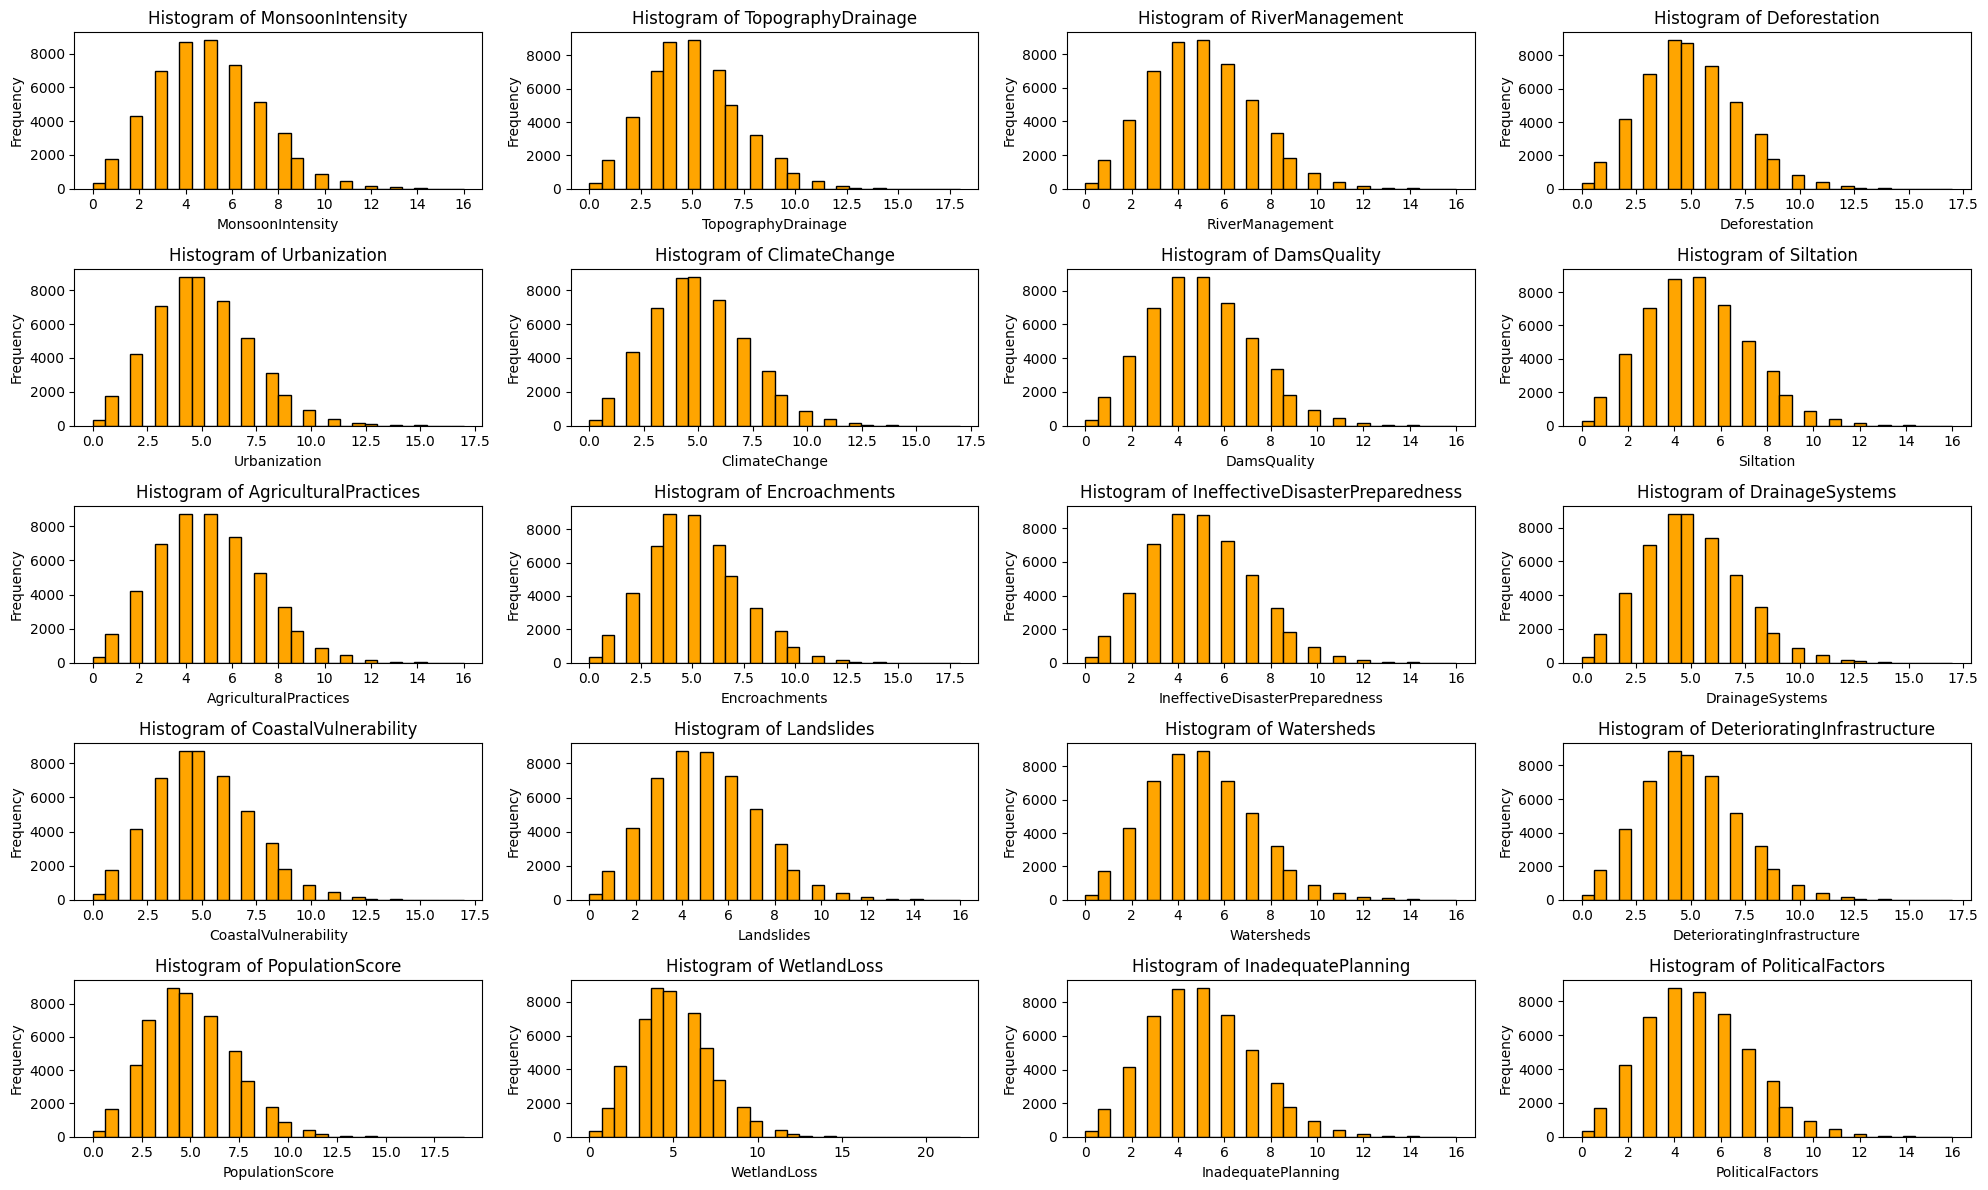

In [13]:
# Create a 3x3 grid for the plots
fig, axes = plt.subplots(5, 4, figsize=(20, 12))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Define numerical_columns
numerical_columns = data.columns.drop('FloodProbability')


# Loop through the numerical columns and plot the histograms and column charts
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

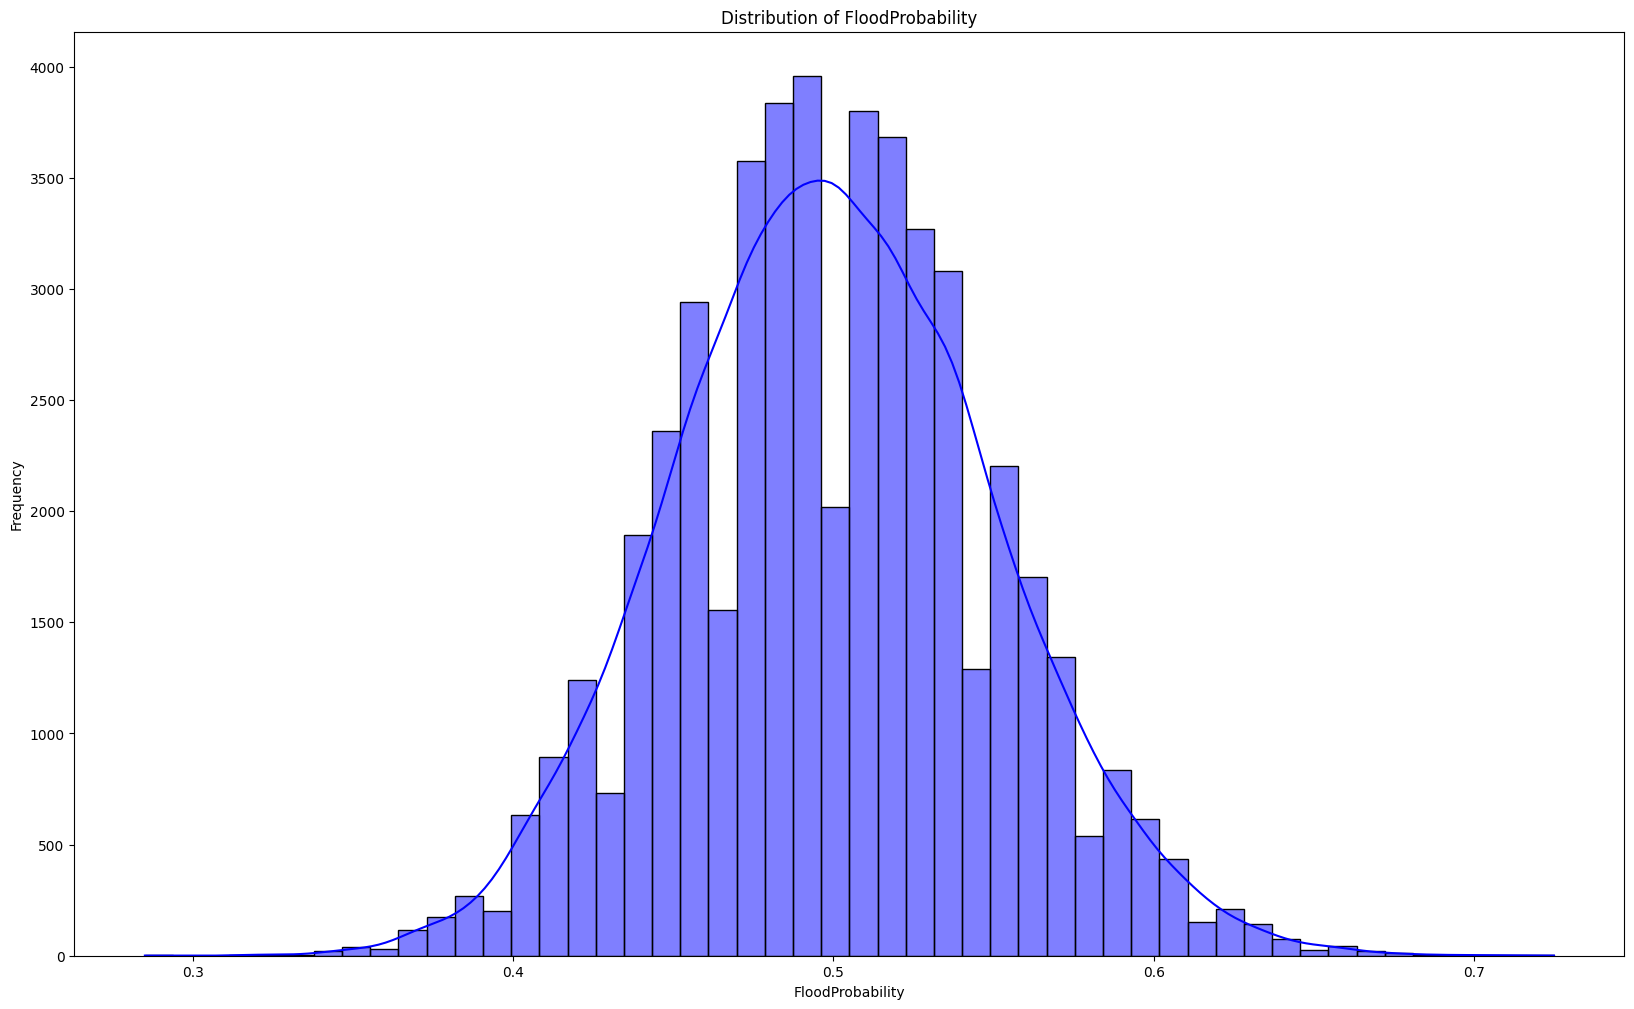

In [14]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['FloodProbability'], kde=True, color='blue', bins=50)
plt.title('Distribution of FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.show()

In [15]:
correlation_matrix = data.corr(numeric_only=True)

In [16]:
correlation_matrix

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,...,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,...,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,...,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,...,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,...,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,...,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,...,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,...,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,...,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,...,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259


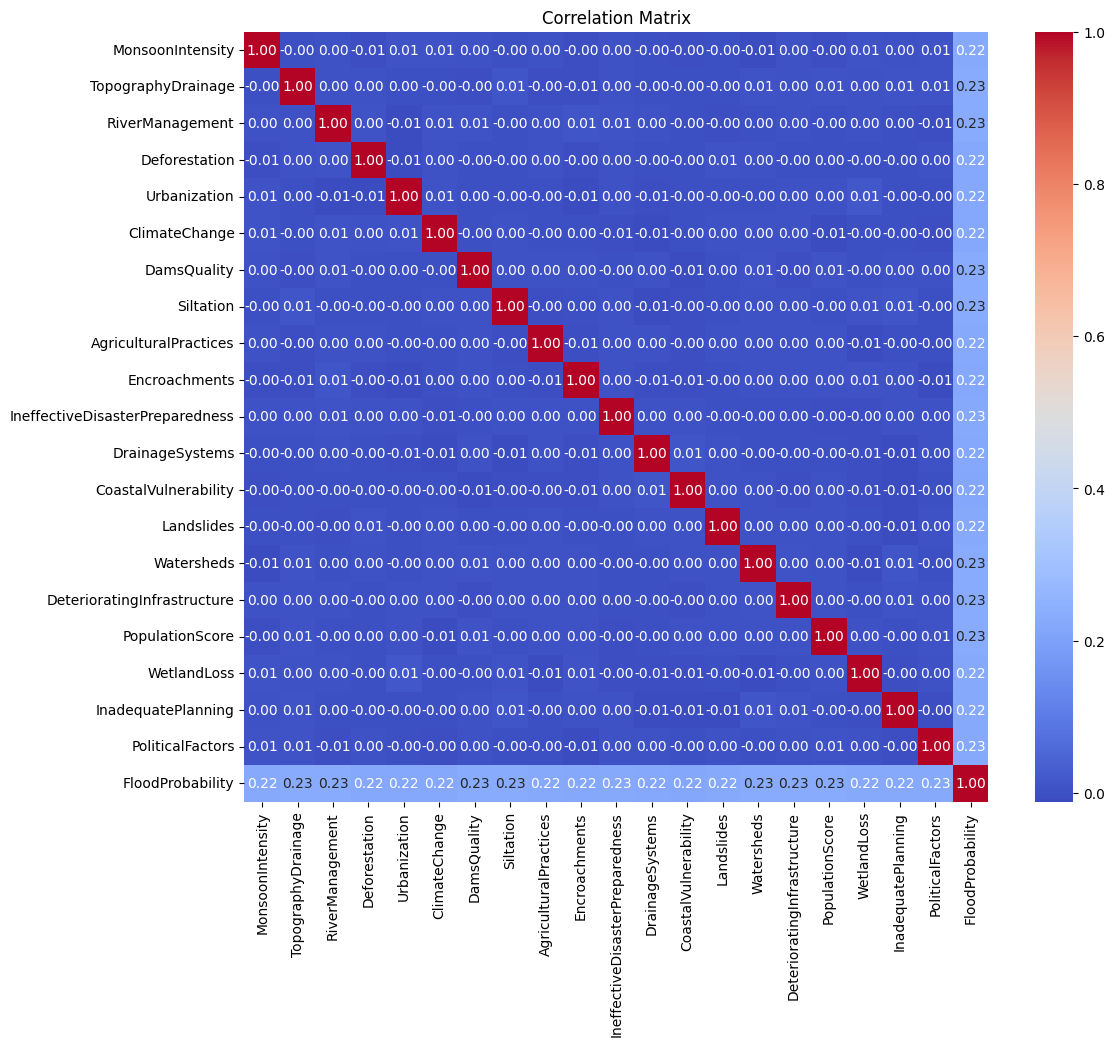

In [17]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Check for missing values
missing_values = data.isnull().sum()

In [19]:
missing_values

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [20]:
# Step 3: Prepare the features (X) and target (y)
X = data.drop(columns=['FloodProbability'])
y = data['FloodProbability']

In [21]:
# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Scale only the feature columns

In [22]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# Step 6: Apply Random Forest Regressor for prediction
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [25]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, mape, r2

(0.02047456000000001,
 0.0006711209520000005,
 np.float64(0.025906002238863496),
 0.04132383598468155,
 0.7305369013357019)

In [26]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [27]:
# Use the trained SVR model to make predictions on the scaled testing data
y_pred_svr = svr_model.predict(X_test)

In [28]:
# Calculate evaluation metrics for the SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the metrics (optional, but good for verification)
print(f"SVR MAE: {mae_svr}")
print(f"SVR MSE: {mse_svr}")
print(f"SVR RMSE: {rmse_svr}")
print(f"SVR MAPE: {mape_svr}")
print(f"SVR R2: {r2_svr}")

SVR MAE: 0.02017997846380282
SVR MSE: 0.0006984723204456066
SVR RMSE: 0.02642862691184706
SVR MAPE: 0.04204040099203317
SVR R2: 0.7195549993818169


In [29]:
# Define the parameter grid for GridSearchCV for the SVR model
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear']
}

In [30]:
# Instantiate an SVR model with default parameters
svr = SVR()

# Instantiate GridSearchCV with the SVR model, the parameter grid, and 5-fold cross-validation
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['rbf', 'linear']})

In [31]:
# Access the best SVR model from GridSearchCV
best_svr_model = grid_search_svr.best_estimator_

# Use the best SVR model to make predictions on the scaled test set
y_pred_best_svr = best_svr_model.predict(X_test)

# Calculate evaluation metrics for the best SVR model
mae_best_svr = mean_absolute_error(y_test, y_pred_best_svr)
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
rmse_best_svr = np.sqrt(mse_best_svr)
mape_best_svr = mean_absolute_percentage_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)

# Print the metrics
print(f"Best SVR MAE: {mae_best_svr}")
print(f"Best SVR MSE: {mse_best_svr}")
print(f"Best SVR RMSE: {rmse_best_svr}")
print(f"Best SVR MAPE: {mape_best_svr}")
print(f"Best SVR R2: {r2_best_svr}")

Best SVR MAE: 0.002277436533503463
Best SVR MSE: 8.109643163973097e-06
Best SVR RMSE: 0.002847743521452221
Best SVR MAPE: 0.004704796643820891
Best SVR R2: 0.996743881159553


In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [34]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [35]:
y_pred_knn = knn_model.predict(X_test)

In [36]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN MAE: {mae_knn}")
print(f"KNN MSE: {mse_knn}")
print(f"KNN RMSE: {rmse_knn}")
print(f"KNN MAPE: {mape_knn}")
print(f"KNN R2: {r2_knn}")

KNN MAE: 0.018582300000000003
KNN MSE: 0.0005612764999999999
KNN RMSE: 0.023691274765195728
KNN MAPE: 0.03687086030462835
KNN R2: 0.7746407641622075


In [37]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

In [38]:
# Instantiate a KNeighborsRegressor with default parameters
knn = KNeighborsRegressor()

# Instantiate GridSearchCV with the KNN model, the parameter grid, and 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [39]:
# Extract the best n_neighbors value
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Extract the best KNN model
best_knn_model = grid_search.best_estimator_

In [40]:
# Use the best model to make predictions on the test set
y_pred_best_knn = best_knn_model.predict(X_test)

# Calculate evaluation metrics for the best KNN model
mae_best_knn = mean_absolute_error(y_test, y_pred_best_knn)
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
rmse_best_knn = np.sqrt(mse_best_knn)
mape_best_knn = mean_absolute_percentage_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

# Print the metrics
print(f"Best KNN MAE: {mae_best_knn}")
print(f"Best KNN MSE: {mse_best_knn}")
print(f"Best KNN RMSE: {rmse_best_knn}")
print(f"Best KNN MAPE: {mape_best_knn}")
print(f"Best KNN R2: {r2_best_knn}")

Best KNN MAE: 0.017793045454545454
Best KNN MSE: 0.0005166915495867768
Best KNN RMSE: 0.02273085017298686
Best KNN MAPE: 0.03516517885940745
Best KNN R2: 0.7925421556421463


In [41]:
xgb_model = XGBRegressor(random_state=42)

In [42]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
y_pred_xgb = xgb_model.predict(X_test)

In [44]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAPE: {mape_xgb}")
print(f"XGBoost R2: {r2_xgb}")

XGBoost MAE: 0.010814186096787453
XGBoost MSE: 0.00018627406166298944
XGBoost RMSE: 0.013648225586609764
XGBoost MAPE: 0.021691113962659995
XGBoost R2: 0.9252087336762307


In [45]:
# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [46]:
# Instantiate an XGBRegressor
xgb = XGBRegressor(random_state=42)

# Instantiate GridSearchCV with the XGBoost model, the parameter grid, and 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]})

In [47]:
# Access the best hyperparameters found by GridSearchCV
best_params_xgb = grid_search_xgb.best_params_

# Access the best estimator (the trained XGBoost model)
best_xgb_model = grid_search_xgb.best_estimator_

# Print the best hyperparameters
print("Best XGBoost Hyperparameters:", best_params_xgb)

Best XGBoost Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


In [48]:
# Use the best XGBoost model to make predictions on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics for the best XGBoost model
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
mape_best_xgb = mean_absolute_percentage_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print the metrics
print(f"Best XGBoost MAE: {mae_best_xgb}")
print(f"Best XGBoost MSE: {mse_best_xgb}")
print(f"Best XGBoost RMSE: {rmse_best_xgb}")
print(f"Best XGBoost MAPE: {mape_best_xgb}")
print(f"Best XGBoost R2: {r2_best_xgb}")

Best XGBoost MAE: 0.005643565858244897
Best XGBoost MSE: 5.065176245573281e-05
Best XGBoost RMSE: 0.0071170051605807345
Best XGBoost MAPE: 0.011317046967722106
Best XGBoost R2: 0.9796627108370628


In [49]:
# Get feature importances from the best XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Get the names of the features from the original X DataFrame
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print("Feature Importances (XGBoost):")
display(feature_importance_df)

Feature Importances (XGBoost):


,feature,importance
10,IneffectiveDisasterPreparedness,0.058186
2,RiverManagement,0.056959
15,DeterioratingInfrastructure,0.055183
18,InadequatePlanning,0.053705
19,PoliticalFactors,0.052996
6,DamsQuality,0.052254
13,Landslides,0.052181
3,Deforestation,0.051273
17,WetlandLoss,0.049988
1,TopographyDrainage,0.049987


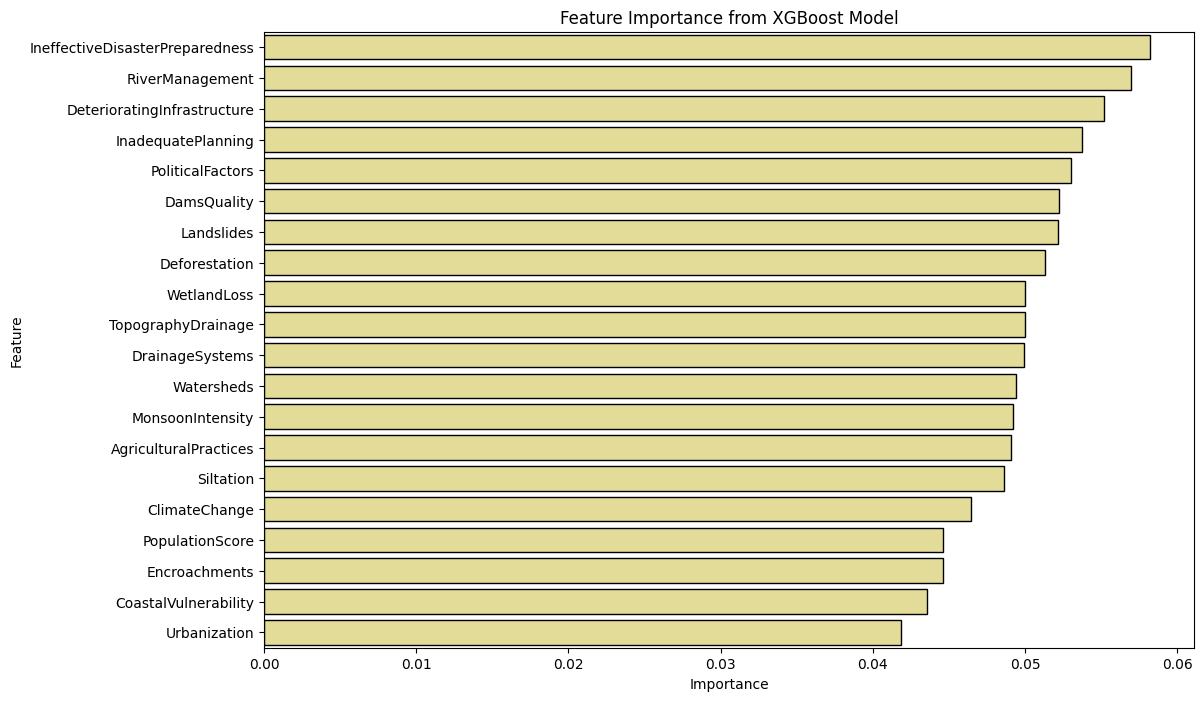

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, color='khaki', edgecolor='black')
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [56]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best SVR model
perm_importance_svr = permutation_importance(best_svr_model, X_test, y_test, random_state=42)

# Get the feature importances and sort them
sorted_idx = perm_importance_svr.importances_mean.argsort()
feature_importance_svr_df = pd.DataFrame({
    'feature': X.columns[sorted_idx],
    'importance': perm_importance_svr.importances_mean[sorted_idx]
})

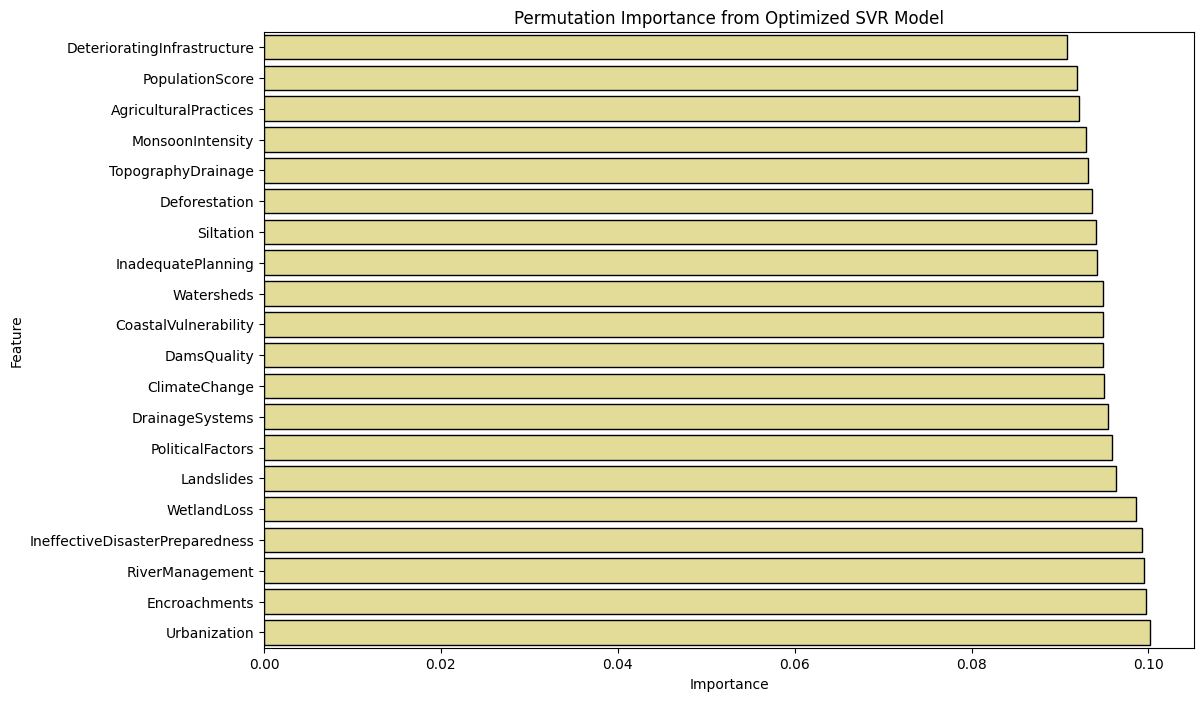

In [57]:
# Plot the permutation importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_svr_df, color='khaki', edgecolor='black')
plt.title('Permutation Importance from Optimized SVR Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **Report**

# Data Loading and Initial Exploration

The dataset was imported from Google Drive into Google Colab, containing 50,000
rows and 21 columns. Initial checks confirmed the dataset’s quality, with no missing values and no duplicate rows. Descriptive statistics provided insights into the data distribution, including the mean, standard deviation, minimum, maximum, and quartiles for each feature. This ensured a clear understanding of the dataset before preprocessing and model training.

# Data Preprocessing
In the preprocessing stage, the target variable was defined as FloodProbability, while the remaining columns were considered features. Since many machine learning algorithms are sensitive to the scale of input features, the features were standardized using StandardScaler. This transformation ensured that all variables contributed equally to model training. The dataset was then split into 80% training data and 20% testing data, with a fixed random_state=42 to maintain reproducibility across experiments.

# Model Training and Hyperparameter Tuning

Multiple machine learning models were implemented and evaluated using metrics such as MAE, MSE, RMSE, MAPE, and R². The Random Forest Regressor provided a strong baseline, while the Support Vector Regressor (SVR) showed improved performance after hyperparameter tuning with GridSearchCV. The K-Nearest Neighbors (KNN) model initially performed moderately, but optimization of the n_neighbors parameter enhanced its accuracy. Among all models, the Support Vector Regressor (SVR) achieved the best results, delivering the highest R² score and the lowest error values.

To further refine the models, GridSearchCV with 5-fold cross-validation was applied in all of the models.

# Feature Importance Analysis

One of the strengths of the Support Vector Regressor model lies in its ability to evaluate feature importance. The analysis identified the top five influential factors contributing to flood probability: Ineffective Disaster Preparedness, River Management, Deteriorating Infrastructure, Inadequate Planning, and Political Factors. These findings highlight how social, political, and infrastructural elements significantly influence flood risks.

# Conclusion

This project demonstrates the potential of machine learning techniques in predicting flood probability with high accuracy. Among the tested models, SVR model emerged as the most effective and reliable, providing both strong predictive performance and valuable insights into the most impactful features. The results emphasize that addressing disaster preparedness, infrastructure quality, and planning policies is crucial for effective flood risk mitigation.